In [86]:
import pandas as pd
from plotnine import *
import os
import folium
pd.options.display.max_columns =500
pd.options.display.max_rows =500

In [31]:
os.listdir('../data/공공데이터_상권정보')

['소상공인시장진흥공단_상가업소정보_201812_1.csv',
 '소상공인시장진흥공단_상가업소정보_201812_3.csv',
 '소상공인시장진흥공단_상가업소정보_201812_2.csv',
 '소상공인시장진흥공단_상가업소정보_201812_4.csv']

In [32]:
data = pd.read_csv('../data/공공데이터_상권정보/소상공인시장진흥공단_상가업소정보_201812_1.csv', encoding='cp949')
print(data.shape)
data.head()

(499328, 39)


,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,표준산업분류명,시도코드,시도명,시군구코드,시군구명,행정동코드,행정동명,법정동코드,법정동명,지번코드,대지구분코드,대지구분명,지번본번지,지번부번지,지번주소,도로명코드,도로명,건물본번지,건물부번지,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,19905471,와라와라호프,NaN,Q,음식,Q09,유흥주점,Q09A01,호프/맥주,I56219,기타 주점업,11,서울특별시,11680,강남구,1168060000,대치1동,1168010600,대치동,1168010600206040000,1,대지,604,NaN,서울특별시 강남구 대치동 604,116802000003,서울특별시 강남구 남부순환로,2933,NaN,1168010600106040000014378,대치상가,서울특별시 강남구 남부순환로 2933,135280,6280.0,NaN,1,NaN,127.061026,37.493922
1,19911397,커피빈코리아선릉로93길점,코리아선릉로93길점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,비알콜 음료점업,11,서울특별시,11680,강남구,1168064000,역삼1동,1168010100,역삼동,1168010100206960042,1,대지,696,42.0,서울특별시 강남구 역삼동 696-42,116804166502,서울특별시 강남구 선릉로93길,6,NaN,1168010100106960042022041,NaN,서울특별시 강남구 선릉로93길 6,135080,6149.0,NaN,1,NaN,127.047883,37.505675
2,19911801,프로포즈,NaN,Q,음식,Q09,유흥주점,Q09A01,호프/맥주,I56219,기타 주점업,11,서울특별시,11545,금천구,1154563000,독산3동,1154510200,독산동,1154510200201620001,1,대지,162,1.0,서울특별시 금천구 독산동 162-1,115453117003,서울특별시 금천구 가산로,34,6.0,1154510200101620001017748,NaN,서울특별시 금천구 가산로 34-6,153010,8545.0,NaN,1,NaN,126.899220,37.471711
3,19912201,싱싱커피&토스트,NaN,Q,음식,Q07,패스트푸드,Q07A10,토스트전문,I56192,"피자, 햄버거, 샌드위치 및 유사 음식점업",26,부산광역시,26530,사상구,2653062000,괘법동,2653010400,괘법동,2653010400205780000,1,대지,578,NaN,부산광역시 사상구 괘법동 578,265303139004,부산광역시 사상구 괘감로,37,NaN,2653010400105780000002037,산업용품유통상가,부산광역시 사상구 괘감로 37,617726,46977.0,NaN,1,26,128.980455,35.159774
4,19932756,가락사우나내스낵,NaN,F,생활서비스,F09,대중목욕탕/휴게,F09A02,사우나/증기탕/온천,S96121,욕탕업,11,서울특별시,11710,송파구,1171060000,석촌동,1171010500,석촌동,1171010500202560000,1,대지,256,NaN,서울특별시 송파구 석촌동 256,117103123001,서울특별시 송파구 가락로,71,NaN,1171010500102560005010490,NaN,서울특별시 송파구 가락로 71,138846,5690.0,NaN,1,NaN,127.104071,37.500249


In [33]:
data.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

In [38]:
view_columns = ['상호명', '지점명', '상권업종대분류명', '상권업종중분류명',
              '상권업종소분류명', '시도명', '시군구명', 
              '행정동명', '법정동명', '지번주소', '경도', '위도']

In [39]:
data=data[view_columns]

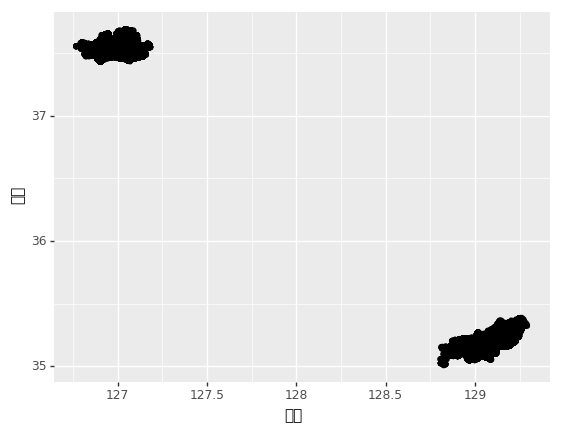

<ggplot: (7545098935)>

In [40]:
#서울과 부산 데이터만 있는 것 같음 -> 데이터의 시군구에서 '서울'만 필터 예정
(ggplot(data)
+ aes(x="경도", y="위도")
+ geom_point()
)

In [43]:
data_seoul=data.loc[data['시도명']=='서울특별시']

In [44]:
data_seoul.shape

(345268, 12)

In [69]:
data_seoul.head()

,상호명,지점명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,지번주소,경도,위도
0,와라와라호프,NaN,음식,유흥주점,호프/맥주,서울특별시,강남구,대치1동,대치동,서울특별시 강남구 대치동 604,127.061026,37.493922
1,커피빈코리아선릉로93길점,코리아선릉로93길점,음식,커피점/카페,커피전문점/카페/다방,서울특별시,강남구,역삼1동,역삼동,서울특별시 강남구 역삼동 696-42,127.047883,37.505675
2,프로포즈,NaN,음식,유흥주점,호프/맥주,서울특별시,금천구,독산3동,독산동,서울특별시 금천구 독산동 162-1,126.899220,37.471711
4,가락사우나내스낵,NaN,생활서비스,대중목욕탕/휴게,사우나/증기탕/온천,서울특별시,송파구,석촌동,석촌동,서울특별시 송파구 석촌동 256,127.104071,37.500249
5,허술한집,NaN,음식,분식,라면김밥분식,서울특별시,강서구,공항동,공항동,서울특별시 강서구 공항동 45-89,126.809957,37.562013


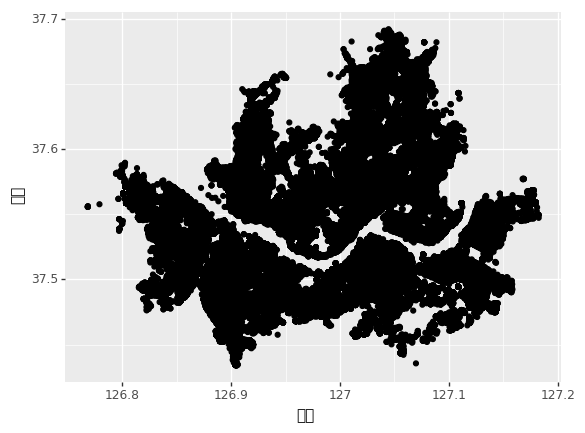

<ggplot: (-9223372029268038305)>

In [45]:
(ggplot(data_seoul)
+ aes(x="경도", y="위도")
+ geom_point()
)

/Users/hoyounson/anaconda3/lib/python3.7/site-packages/plotnine/guides/guides.py:198: UserWarning: Cannot generate legend for the 'fill' aesthetic. Make sure you have mapped a variable to it
  "variable to it".format(output))


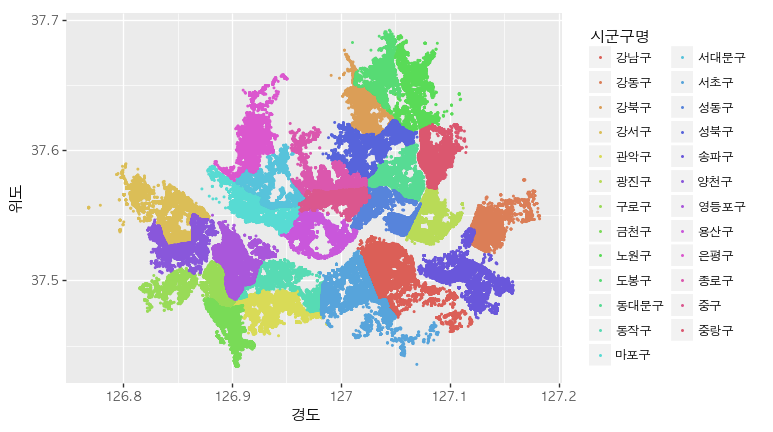

<ggplot: (-9223372029263535651)>

In [67]:
(ggplot(data_seoul)
+ aes(x="경도", y="위도", color='시군구명')
+ geom_point(alpha=1.0, size=0.2)
+ theme(text=element_text(family='AppleGothic'))
+ scale_fill_gradient(low = 'blue', high = 'green') 
)

In [68]:
#matplotlib에서 사용 가능한 폰트 리스트 업
# import matplotlib.font_manager as font_manager

# font_list = font_manager.findSystemFonts(fontpaths=None, fontext='ttf')

# print('사용가능한 TTF 폰트 개수:', len(font_list))
# font_list[:10] # 목록에서 처음 10 개만 보기

In [71]:
data_seoul['상권업종대분류명'].value_counts()

음식          112894
소매          106490
생활서비스        57266
학문/교육        27717
의료           15299
부동산          13164
관광/여가/오락      9536
숙박            2790
스포츠            112
Name: 상권업종대분류명, dtype: int64

### 상권업종대분류명으로 ggplot 찍어 보기

/Users/hoyounson/anaconda3/lib/python3.7/site-packages/plotnine/guides/guides.py:198: UserWarning: Cannot generate legend for the 'fill' aesthetic. Make sure you have mapped a variable to it
  "variable to it".format(output))


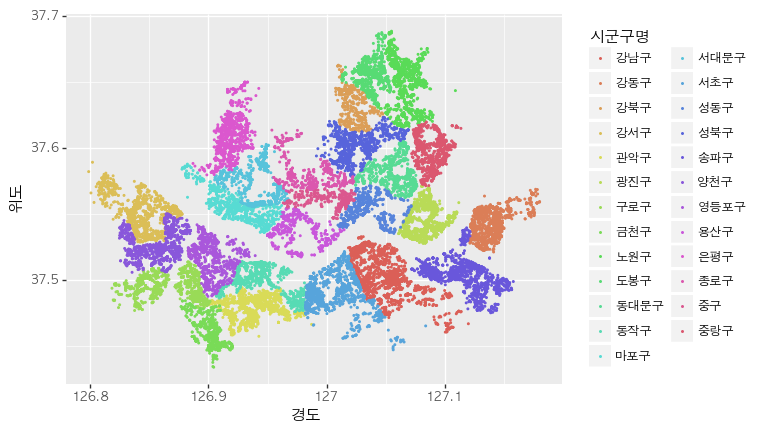

<ggplot: (-9223372029244652526)>

In [76]:
(ggplot(data_seoul.loc[data_seoul['상권업종대분류명']=='학문/교육'])
+ aes(x="경도", y="위도", color='시군구명')
+ geom_point(alpha=1.0, size=0.2)
+ theme(text=element_text(family='AppleGothic'))
+ scale_fill_gradient(low = 'blue', high = 'green') 
)

In [83]:
data_seoul['상권업종소분류명'].value_counts()

한식/백반/한정식        23785
커피전문점/카페/다방      16088
여성미용실            15957
부동산중개            12508
일반의류              9710
편의점               8405
종합소매              7551
호프/맥주             7343
라면김밥분식            6500
학원-입시             6346
비만/피부관리           5473
세탁소/빨래방           5392
화장품판매점            5004
후라이드/양념치킨         4386
수퍼마켓              4361
어린이집              4324
갈비/삼겹살            4249
학원(종합)            4073
노래방               3798
정통양식/경양식          3538
제과점               3472
인쇄종합              3465
자동차정비/카센타         3294
핸드폰소매             3090
약국                3018
학원-외국어/어학         2951
중국음식/중국집          2684
발/네일케어            2683
피아노/바이올린/기타       2567
국수/만두/칼국수         2531
한의원               2519
음식점-일식            2451
치과의원              2440
식료품점              2393
꽃집/꽃배달            2339
남성미용실             2334
사무/문구용품           2240
여성의류전문점           2194
청과물소매             2152
인테리어/욕실용품/커튼      2093
모텔/여관/여인숙         2009
안경원               1956
룸살롱/단란주점          1830
인터넷PC방     

/Users/hoyounson/anaconda3/lib/python3.7/site-packages/plotnine/guides/guides.py:198: UserWarning: Cannot generate legend for the 'fill' aesthetic. Make sure you have mapped a variable to it
  "variable to it".format(output))


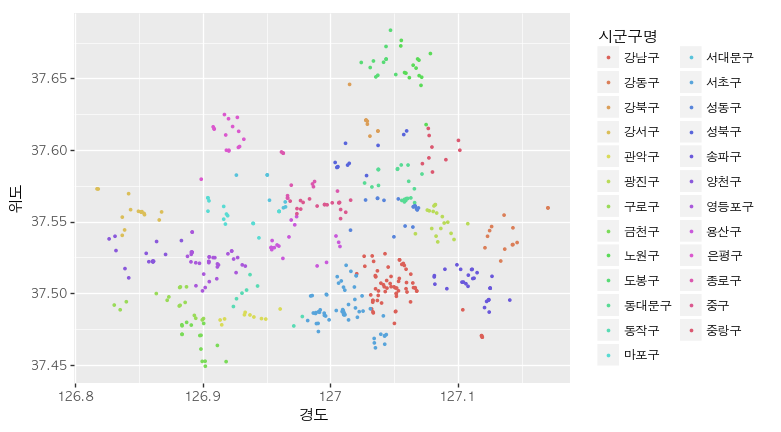

<ggplot: (7538606856)>

In [84]:
#상권업종 소분류명이 핸드폰 소매인 곳만 찍어봄
(ggplot(data_seoul.loc[data_seoul['상권업종소분류명']=='자동차판매'])
+ aes(x="경도", y="위도", color='시군구명')
+ geom_point(alpha=1.0, size=0.5)
+ theme(text=element_text(family='AppleGothic'))
+ scale_fill_gradient(low = 'blue', high = 'green') 
)

/Users/hoyounson/anaconda3/lib/python3.7/site-packages/plotnine/guides/guides.py:198: UserWarning: Cannot generate legend for the 'fill' aesthetic. Make sure you have mapped a variable to it
  "variable to it".format(output))


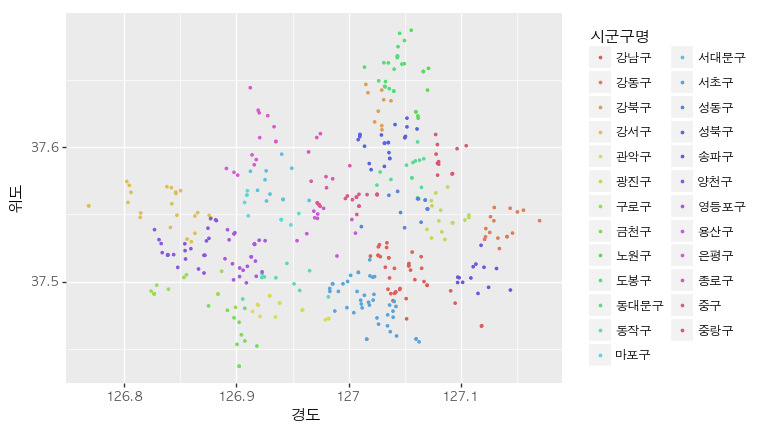

<ggplot: (7680168526)>

In [85]:
(ggplot(data_seoul.loc[data_seoul['상권업종소분류명']=='주유소'])
+ aes(x="경도", y="위도", color='시군구명')
+ geom_point(alpha=1.0, size=0.5)
+ theme(text=element_text(family='AppleGothic'))
+ scale_fill_gradient(low = 'blue', high = 'green') 
)

In [101]:
data_seoul.loc[data_seoul['상권업종소분류명']=='주유소'].head(3)

,상호명,지점명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,지번주소,경도,위도
128,괴산주유소,NaN,생활서비스,주유소/충전소,주유소,서울특별시,강동구,명일2동,명일동,서울특별시 강동구 명일동 38,127.150456,37.551772
241,오천주유소,NaN,생활서비스,주유소/충전소,주유소,서울특별시,강남구,삼성1동,삼성동,서울특별시 강남구 삼성동 71-9,127.053779,37.513490
955,GS칼텍스,NaN,생활서비스,주유소/충전소,주유소,서울특별시,용산구,원효로1동,원효로2가,서울특별시 용산구 원효로2가 70-2,126.962698,37.535584


In [106]:
#folium으로 찍어보자 
map_basic = folium.Map(
    #서울을 지도 중심으로 잡고,
    location=[37.55, 126.971331],
    zoom_start=11
)

#지도위에 마커 생성 및 마커 정보 생성

data = data_seoul.loc[data_seoul['상권업종소분류명']=='주유소']

for i in range(0,len(data)):
    folium.Marker(
        # 위도 / 경도 순으로 표시
        [data.iloc[i,-1], data.iloc[i,-2]],
        #아이콘 클릭시 팝업 내용: 주소
        popup=data.iloc[i,-3],
        #아이콘 위에 커서 올리면 보이는 정보: 상호명
        tooltip =data.iloc[i,0],
        icon=folium.Icon(color='red', icon='info-sign')
    ).add_to(map_basic)

map_basic

In [126]:
data.groupby(['시군구명','행정동명']).count()

상호명  지점명  상권업종대분류명  상권업종중분류명  상권업종소분류명  시도명  법정동명  지번주소  경도  \
시군구명 행정동명                                                                       
강남구  개포4동           1    0         1         1         1    1     1     1   1   
     논현1동           1    0         1         1         1    1     1     1   1   
     논현2동           4    0         4         4         4    4     4     4   4   
     대치2동           3    0         3         3         3    3     3     3   3   
     대치4동           1    0         1         1         1    1     1     1   1   
     도곡1동           5    0         5         5         5    5     5     5   5   
     도곡2동           1    0         1         1         1    1     1     1   1   
     삼성1동           3    0         3         3         3    3     3     3   3   
     삼성2동           3    2         3         3         3    3     3     3   3   
     세곡동            2    0         2         2         2    2     2     2   2   
     수서동            1    1         1         1         1    1     1     1   1   
     신사동            5    0         5         5         5    5     5     5   5   
     압구정동           2    0         2         2         2    2     2     2   2   
     역삼1동           2    0         2         2         2    2     2     2   2   
     역삼2동           2    0         2         2         2    2     2     2   2   
     일원1동           1    0         1         1         1    1     1     1   1   
     청담동            1    0         1         1         1    1     1     1   1   
강동구  길동             1    0         1         1         1    1     1     1   1   
     둔촌2동           2    0         2         2         2    2     2     2   2   
     명일1동           1    0         1         1         1    1     1     1   1   
     명일2동           2    0         2         2         2    2     2     2   2   
     상일동            1    0         1         1         1    1     1     1   1   
     성내1동           1    0         1         1         1    1     1     1   1   
     성내2동           2    1         2         2         2    2     2     2   2   
     성내3동           2    0         2         2         2    2     2     2   2   
     암사2동           1    0         1         1         1    1     1     1   1   
     암사3동           1    0         1         1         1    1     1     1   1   
     천호2동           2    0         2         2         2    2     2     2   2   
강북구  미아동            1    0         1         1         1    1     1     1   1   
     번1동            1    0         1         1         1    1     1     1   1   
     번2동            1    0         1         1         1    1     1     1   1   
     송천동            3    0         3         3         3    3     3     3   3   
     수유2동           1    0         1         1         1    1     1     1   1   
     수유3동           2    0         2         2         2    2     2     2   2   
강서구  가양1동           5    0         5         5         5    5     5     5   5   
     공항동            4    1         4         4         4    4     4     4   4   
     등촌2동           2    0         2         2         2    2     2     2   2   
     발산1동           1    0         1         1         1    1     1     1   1   
     방화2동           3    1         3         3         3    3     3     3   3   
     염창동            3    0         3         3         3    3     3     3   3   
     우장산동           1    0         1         1         1    1     1     1   1   
     화곡1동           1    0         1         1         1    1     1     1   1   
     화곡2동           1    0         1         1         1    1     1     1   1   
     화곡4동           1    0         1         1         1    1     1     1   1   
     화곡6동           1    0         1         1         1    1     1     1   1   
관악구  낙성대동           1    0         1         1         1    1     1     1   1   
     난곡동            1    0         1         1         1    1     1     1   1   
     남현동            3    0         3         3   

In [127]:
map_basic.save('./gas station distribution in seoul(1812).html')